# Comparison of the performances for the different models

Trained models: random forest, perceptron (with and without elasticnet regularization), SVM

## Loading necessary libraries...

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn

# MOA

In [2]:
methods = ["GNN_full_full_moa", "MLP_full_moa", "MLPalt_full_moa", "RF_full_moa", "RFalt_full_moa", "RRandomForest_full_moa"]
all_scores = {}
metnames = []
for ind in range(len(methods)):
    file = "../../results/F1000/" + methods[ind] + "_Scores_2023-11-09.obj"
    file = open(file, "rb")
    desc_met = methods[ind]
    all_scores[desc_met] = pickle.load(file)
    metnames.append(desc_met)
    
scorelist = ["fit_time", "score_time", "test_accuracy", "test_balanced_accuracy", "test_roc_auc","train_accuracy", "train_balanced_accuracy"]
all_means = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_means[i][j] = np.stack(all_scores[metnames[i]][scorelist[j]]).mean()

# Create the pandas DataFrame
all_means = pd.DataFrame(all_means, columns = scorelist, index = metnames)


all_std = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_std[i][j] = np.stack(all_scores[metnames[i]][scorelist[j]]).std()

# Create the pandas DataFrame
all_std = pd.DataFrame(all_std, columns = scorelist, index = metnames)

# print dataframe.
all_means

fit_time  score_time  test_accuracy  \
GNN_full_full_moa        5863.172747    3.612581       0.471717   
MLP_full_moa             2901.982783    9.743158       0.460274   
MLPalt_full_moa          1258.703576    3.898512       0.372159   
RF_full_moa               338.574888   15.869200       0.381139   
RFalt_full_moa           1245.477675   37.967983       0.396054   
RRandomForest_full_moa  58734.287100  134.615500       0.395687   

                        test_balanced_accuracy  test_roc_auc  train_accuracy  \
GNN_full_full_moa                     0.301283      0.860909        0.646411   
MLP_full_moa                          0.276245      0.852352        0.555346   
MLPalt_full_moa                       0.250423      0.803787        0.668373   
RF_full_moa                           0.155254      0.768165        0.998524   
RFalt_full_moa                        0.174638      0.786602        0.999977   
RRandomForest_full_moa                0.174635      0.767471        0.999977   

                        train_balanced_accuracy  
GNN_full_full_moa                      0.471108  
MLP_full_moa                           0.353048  
MLPalt_full_moa                        0.540490  
RF_full_moa                            0.997802  
RFalt_full_moa                         0.999969  
RRandomForest_full_moa                 0.999968

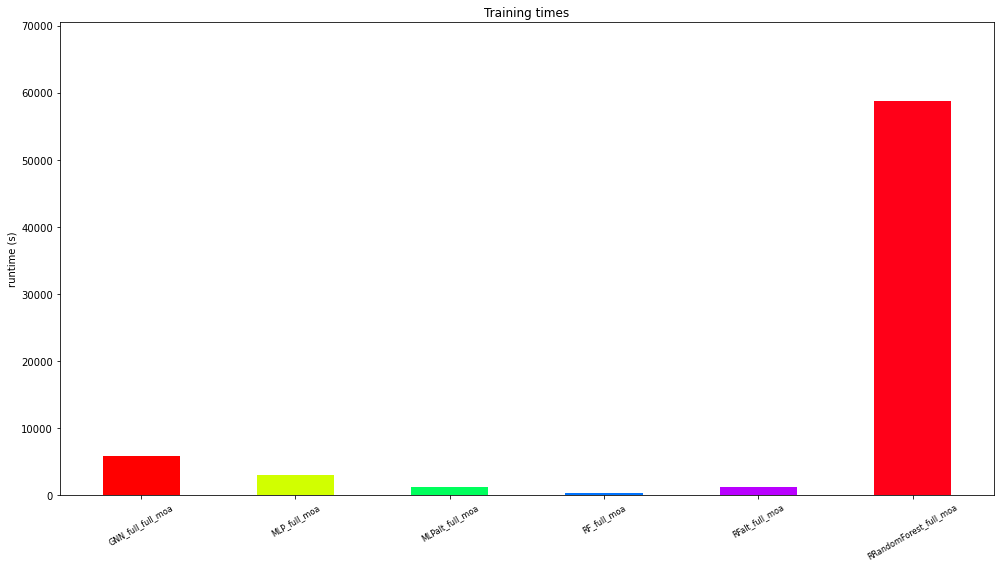

In [3]:
train_time = all_means["fit_time"]
my_cmap = plt.get_cmap("hsv")

def autolabel(rectangles):
    """attach some text vi autolabel on rectangles."""
    for rect in rectangles:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2.0,
            1.05 * height,
            "%.4f" % height,
            ha="center",
            va="bottom",
        )
        plt.setp(plt.xticks()[1], rotation=30)

plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), train_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(train_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Training times")
plt.tight_layout()
plt.show()

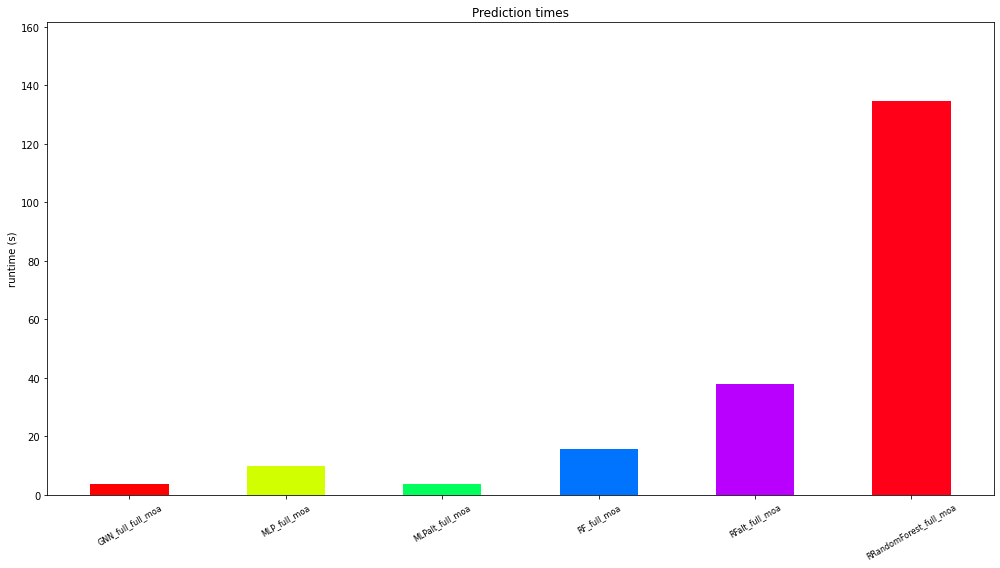

In [4]:
predict_time = all_means["score_time"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), predict_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(predict_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Prediction times")
plt.tight_layout()
plt.show()

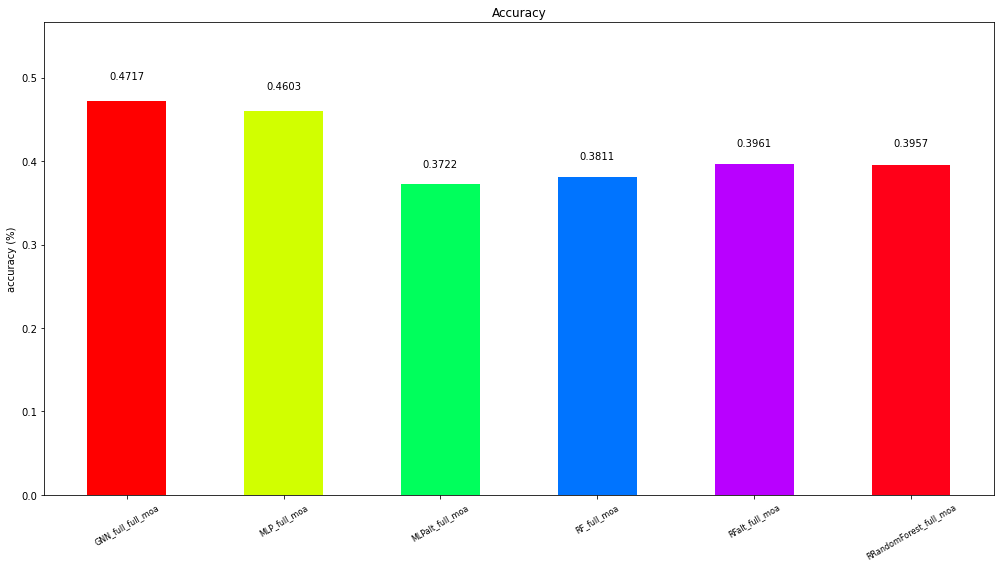

In [5]:
accuracy = all_means["test_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), accuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(accuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

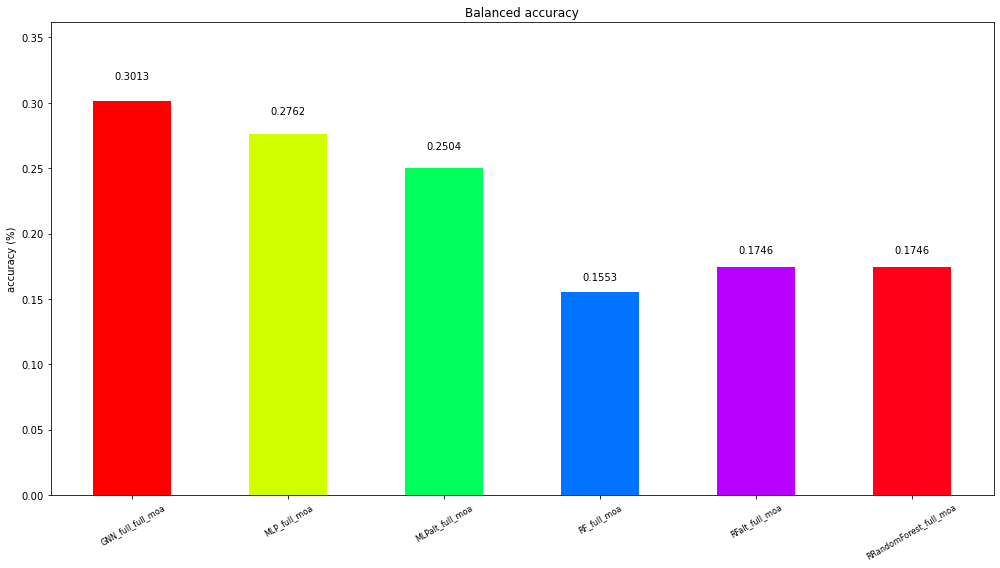

In [6]:
baccuracy = all_means["test_balanced_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), baccuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(baccuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Balanced accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

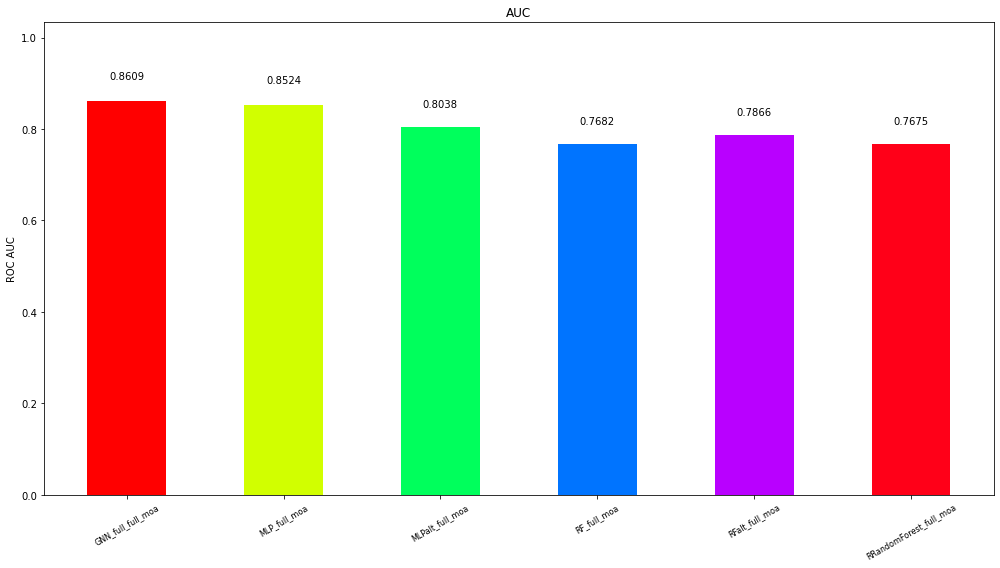

In [7]:
auc = all_means["test_roc_auc"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), auc, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(auc) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("ROC AUC")
ax.set_title("AUC")
autolabel(rectangles)
plt.tight_layout()
plt.show()

# Subtype

In [8]:
methods = ["GNN_full_full_subtype", "MLP_full_subtype", "MLPalt_full_subtype", "RF_full_subtype", "RFalt_full_subtype", "RRandomForest_full_subtype"]
all_scores = {}
metnames = []
for ind in range(len(methods)):
    file = "../../results/F1000/" + methods[ind] + "_Scores_2023-11-09.obj"
    file = open(file, "rb")
    desc_met = methods[ind]
    all_scores[desc_met] = pickle.load(file)
    metnames.append(desc_met)
    
scorelist = ["fit_time", "score_time", "test_accuracy", "test_balanced_accuracy", "test_roc_auc","train_accuracy", "train_balanced_accuracy"]
all_means = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_means[i][j] = np.stack(all_scores[metnames[i]][scorelist[j]]).mean()

# Create the pandas DataFrame
all_means = pd.DataFrame(all_means, columns = scorelist, index = metnames)


all_std = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_std[i][j] = np.stack(all_scores[metnames[i]][scorelist[j]]).std()

# Create the pandas DataFrame
all_std = pd.DataFrame(all_std, columns = scorelist, index = metnames)

# print dataframe.
all_means

fit_time  score_time  test_accuracy  \
GNN_full_full_subtype        5357.871597    4.265178       0.945349   
MLP_full_subtype             3683.450679   10.519338       0.909646   
MLPalt_full_subtype           397.511345    3.355078       0.857111   
RF_full_subtype               430.520059    9.434441       0.515217   
RFalt_full_subtype           1104.423320   25.848661       0.665067   
RRandomForest_full_subtype  72431.237000  113.910400       0.665234   

                            test_balanced_accuracy  test_roc_auc  \
GNN_full_full_subtype                     0.920147      0.997674   
MLP_full_subtype                          0.859649      0.995566   
MLPalt_full_subtype                       0.816987      0.988349   
RF_full_subtype                           0.187749      0.960125   
RFalt_full_subtype                        0.400142      0.982978   
RRandomForest_full_subtype                0.399759      0.975877   

                            train_accuracy  train_balanced_accuracy  
GNN_full_full_subtype             0.995354                 0.990683  
MLP_full_subtype                  0.994780                 0.982957  
MLPalt_full_subtype               0.996794                 0.996371  
RF_full_subtype                   0.538031                 0.204262  
RFalt_full_subtype                1.000000                 1.000000  
RRandomForest_full_subtype        1.000000                 1.000000

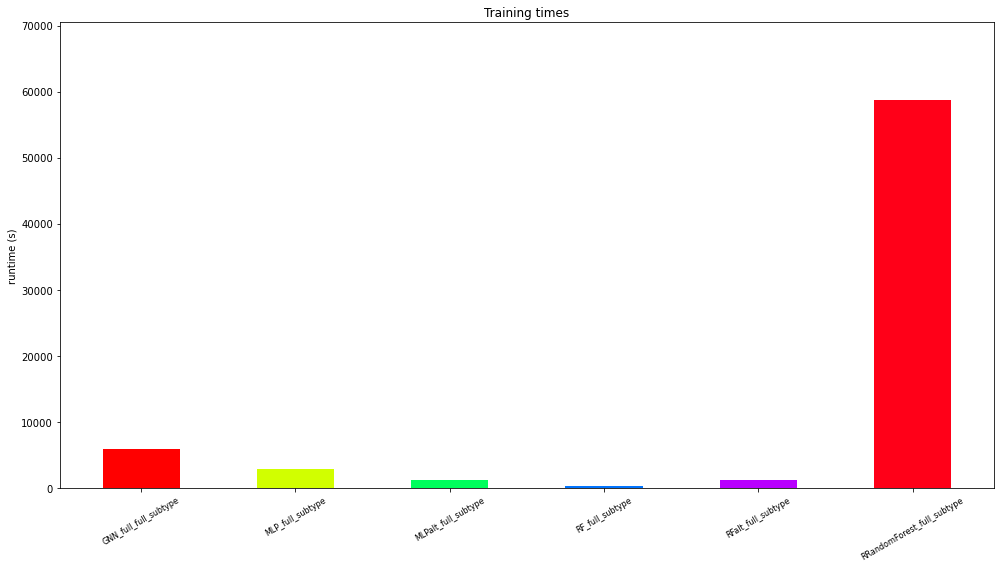

In [9]:
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), train_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(train_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Training times")
plt.tight_layout()
plt.show()

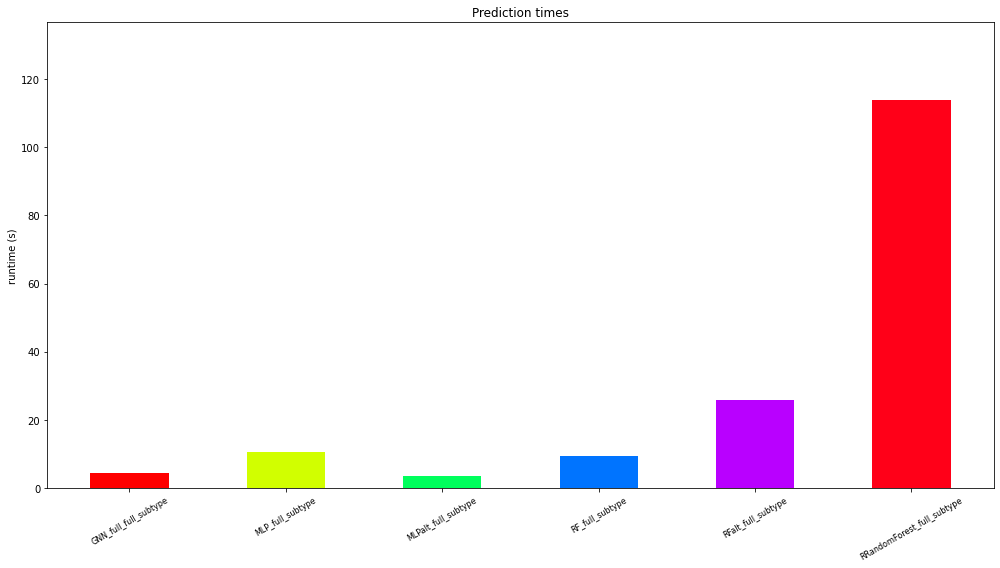

In [10]:
predict_time = all_means["score_time"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), predict_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(predict_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Prediction times")
plt.tight_layout()
plt.show()

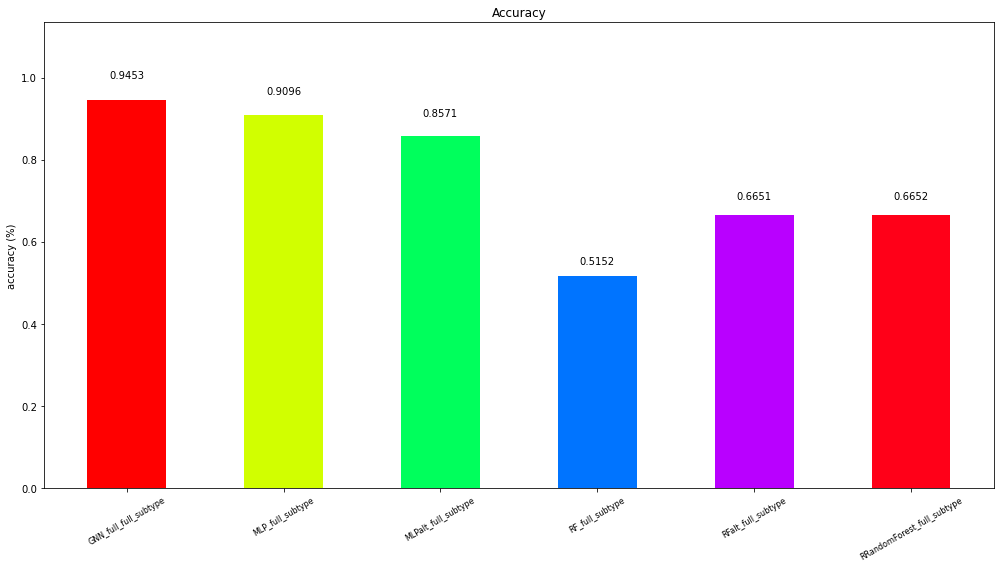

In [11]:
accuracy = all_means["test_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), accuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(accuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

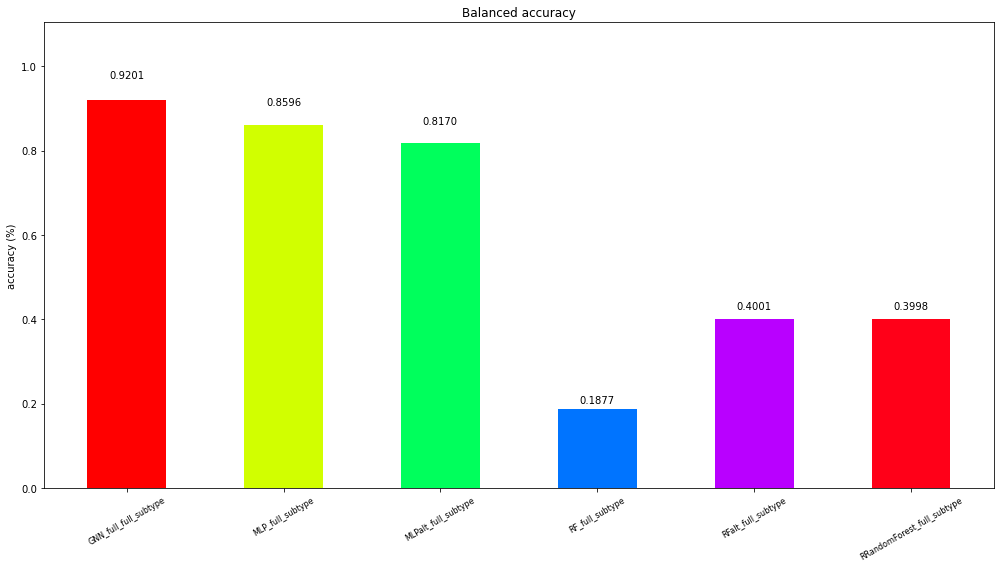

In [12]:
baccuracy = all_means["test_balanced_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), baccuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(baccuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Balanced accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

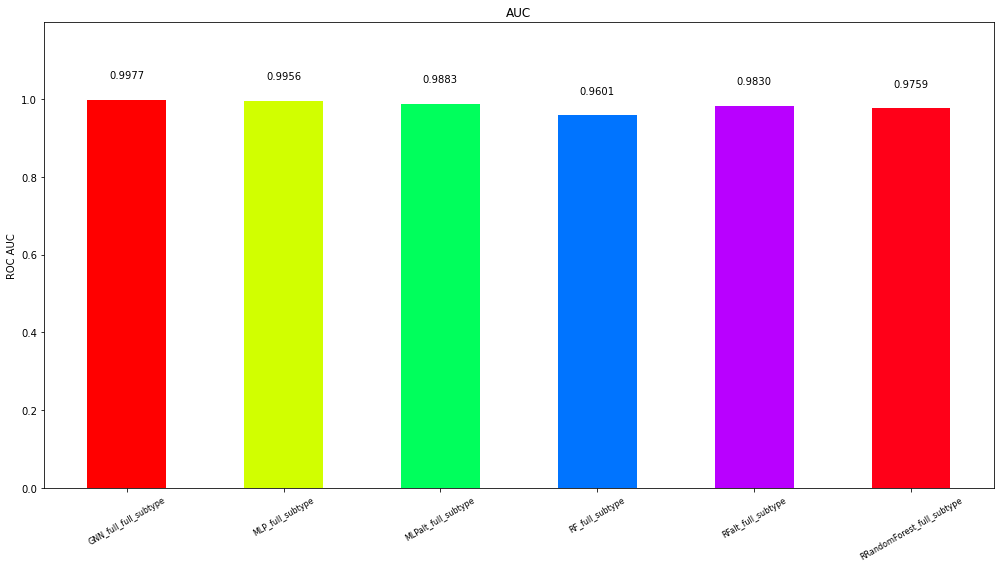

In [13]:
auc = all_means["test_roc_auc"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), auc, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(auc) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("ROC AUC")
ax.set_title("AUC")
autolabel(rectangles)
plt.tight_layout()
plt.show()

# Primary site

In [14]:
methods = ["GNN_full_full_primary_site", "MLP_full_primarysite", "MLPalt_full_primarysite", "RF_full_primarysite",
           "RFalt_full_primarysite", "RRandomForest_full_primarysite"]
all_scores = {}
metnames = []
for ind in range(len(methods)):
    file = "../../results/F1000/" + methods[ind] + "_Scores_2023-11-09.obj"
    file = open(file, "rb")
    desc_met = methods[ind]
    all_scores[desc_met] = pickle.load(file)
    metnames.append(desc_met)
    
scorelist = ["fit_time", "score_time", "test_accuracy", "test_balanced_accuracy", "test_roc_auc","train_accuracy", "train_balanced_accuracy"]
all_means = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_means[i][j] = np.stack(all_scores[metnames[i]][scorelist[j]]).mean()

# Create the pandas DataFrame
all_means = pd.DataFrame(all_means, columns = scorelist, index = metnames)


all_std = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_std[i][j] = np.stack(all_scores[metnames[i]][scorelist[j]]).std()

# Create the pandas DataFrame
all_std = pd.DataFrame(all_std, columns = scorelist, index = metnames)

# print dataframe.
all_means

fit_time  score_time  test_accuracy  \
GNN_full_full_primary_site       6557.630785    3.702349       0.952405   
MLP_full_primarysite             3708.277479   10.500361       0.910439   
MLPalt_full_primarysite           383.810424    3.274077       0.856946   
RF_full_primarysite               705.557752    9.246674       0.568151   
RFalt_full_primarysite           1085.526866   25.033284       0.708337   
RRandomForest_full_primarysite  72809.816800  111.448200       0.708629   

                                test_balanced_accuracy  test_roc_auc  \
GNN_full_full_primary_site                    0.907568      0.998345   
MLP_full_primarysite                          0.835934      0.994671   
MLPalt_full_primarysite                       0.801813      0.986465   
RF_full_primarysite                           0.324003      0.972772   
RFalt_full_primarysite                        0.459601      0.979045   
RRandomForest_full_primarysite                0.460120      0.970081   

                                train_accuracy  train_balanced_accuracy  
GNN_full_full_primary_site            0.999433                 0.996286  
MLP_full_primarysite                  0.994964                 0.957636  
MLPalt_full_primarysite               0.996774                 0.995981  
RF_full_primarysite                   0.619248                 0.384066  
RFalt_full_primarysite                1.000000                 1.000000  
RRandomForest_full_primarysite        1.000000                 1.000000

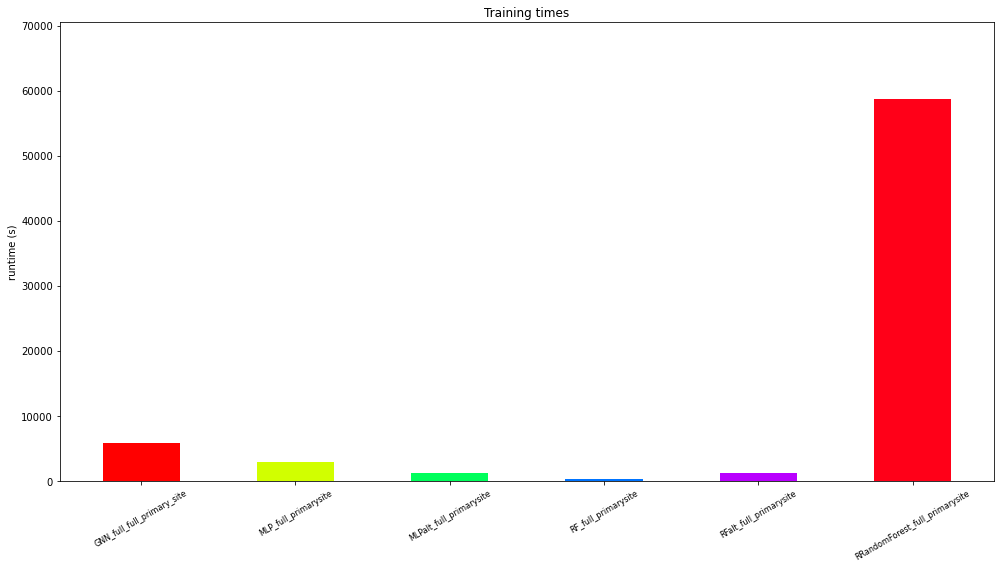

In [15]:
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), train_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(train_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Training times")
plt.tight_layout()
plt.show()

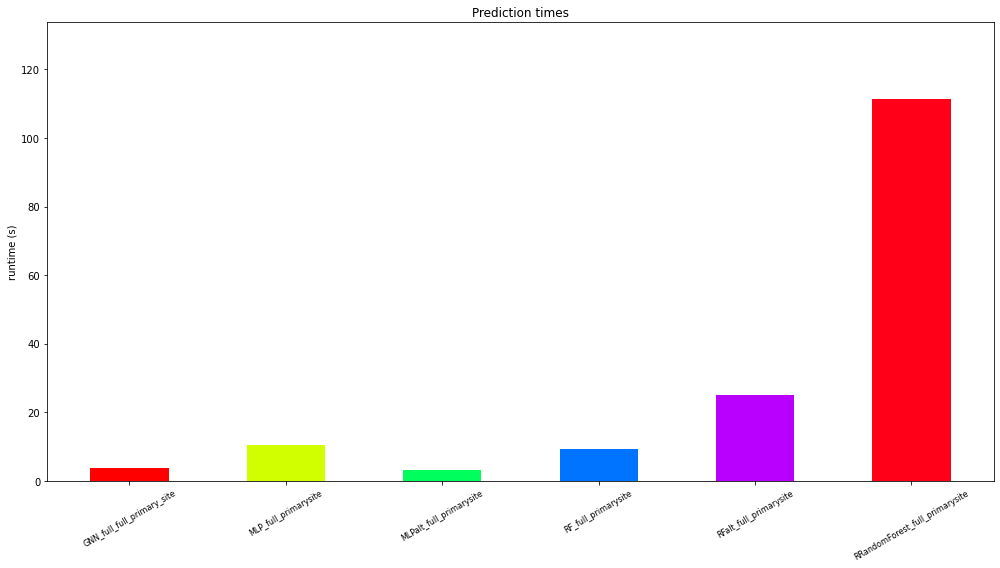

In [16]:
predict_time = all_means["score_time"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), predict_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(predict_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Prediction times")
plt.tight_layout()
plt.show()

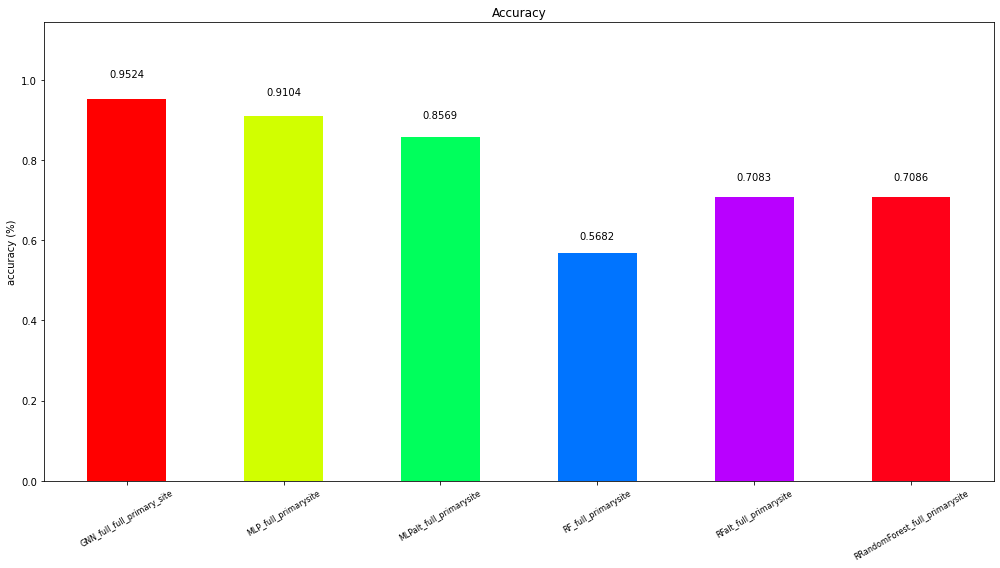

In [17]:
accuracy = all_means["test_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), accuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(accuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

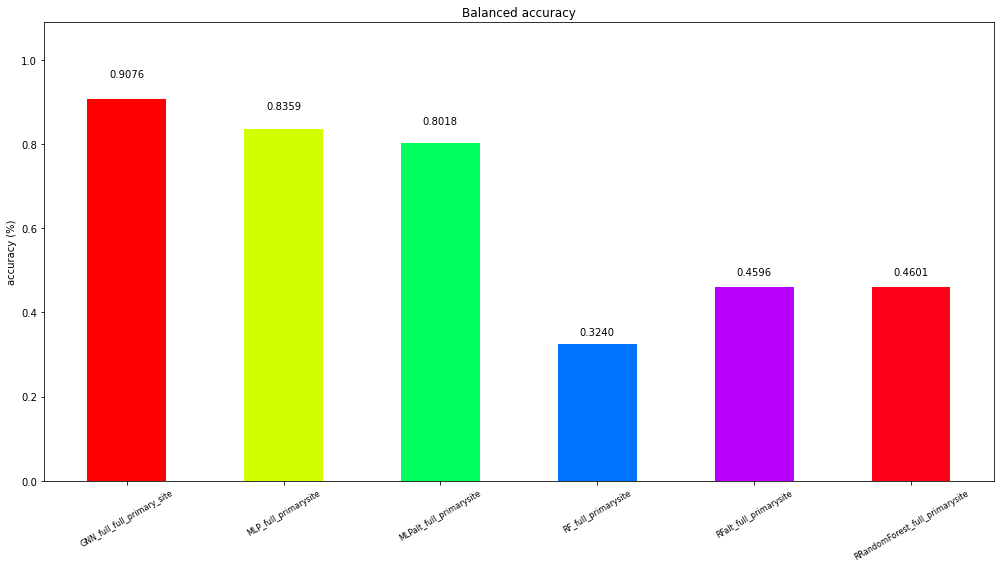

In [18]:
baccuracy = all_means["test_balanced_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), baccuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(baccuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Balanced accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

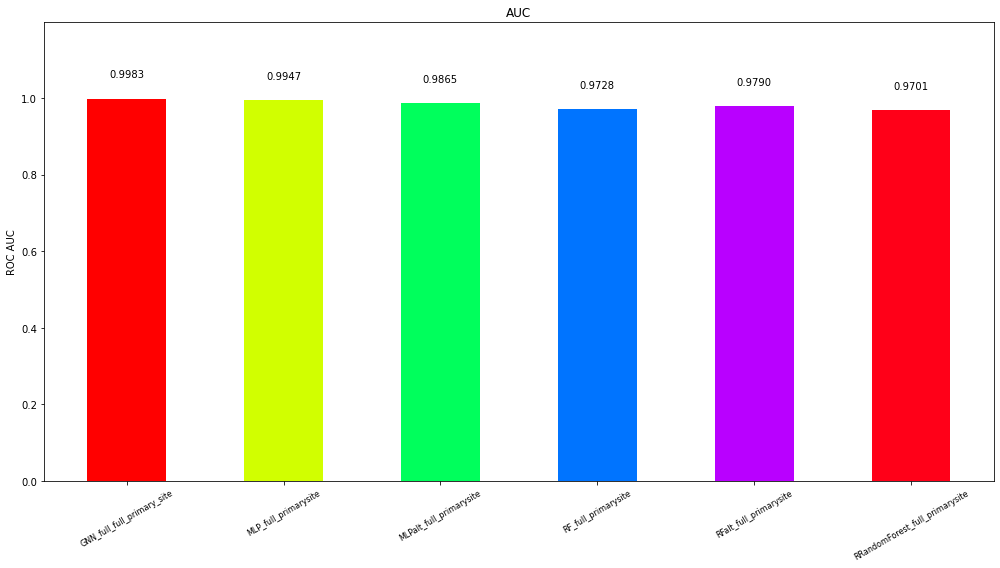

In [19]:
auc = all_means["test_roc_auc"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), auc, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(auc) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("ROC AUC")
ax.set_title("AUC")
autolabel(rectangles)
plt.tight_layout()
plt.show()